# If needed, install

In [1]:
## Uncomment and run if needed
# !pip install tika

# Setting up the libs and data

In [2]:
# Setup and define function for parsing
from tika import parser
def convertPdf2TxtWithTika(in_pdf_file, out_text_file):
    # Load a file and extract information
    print ("INFO: - reading file = " + in_pdf_file)
    
    raw = parser.from_file(in_pdf_file)
    text = raw['content']
    
    ## Post-processing explained at: 
    # https://medium.com/@justinboylantoomey/fast-text-extraction-with-python-and-tika-41ac34b0fe61
    # Convert to string
    text = str(text)
    # Ensure text is utf-8 formatted
    safe_text = text.encode('utf-8', errors='ignore')
    # Escape any \ issues
    safe_text = str(safe_text).replace('\\', '\\\\').replace('"', '\\"')
    
    # Write out extracted content
    text_pdf = open(out_text_file, 'w')
    print ("INFO: - writing file = " + out_text_file)
    text_pdf.write(text)
    text_pdf.close()

In [10]:
# Find pdf files in a directory and process its content
import os
import glob

txtfiles = []
inpath = 'data/input/2020-3fac/'
outpath = 'data/output/'
count = 0
for file in glob.glob(inpath + '*.pdf'):
    justfile = os.path.basename(file)
    justfile = justfile.replace(".pdf","")
    print('INFO: processing file = ' + os.path.basename(file))
    output_file = outpath + justfile + '.txt'
    print('INFO: - in = ' + file + ', out = ' + output_file)
    convertPdf2TxtWithTika(file, output_file)
    count = count + 1
print('INFO: processed total files = ' + str(count))

INFO: processing file = Example-CSCE_590_Syllabus_Functional_Programming.pdf
INFO: - in = data/input/2020-3fac/Example-CSCE_590_Syllabus_Functional_Programming.pdf, out = data/output/Example-CSCE_590_Syllabus_Functional_Programming.txt
INFO: - reading file = data/input/2020-3fac/Example-CSCE_590_Syllabus_Functional_Programming.pdf
INFO: - writing file = data/output/Example-CSCE_590_Syllabus_Functional_Programming.txt
INFO: processing file = Example-CSCE771_001_Fall2020.pdf
INFO: - in = data/input/2020-3fac/Example-CSCE771_001_Fall2020.pdf, out = data/output/Example-CSCE771_001_Fall2020.txt
INFO: - reading file = data/input/2020-3fac/Example-CSCE771_001_Fall2020.pdf
INFO: - writing file = data/output/Example-CSCE771_001_Fall2020.txt
INFO: processing file = Example-CSCE210_002_Fall2020 .pdf
INFO: - in = data/input/2020-3fac/Example-CSCE210_002_Fall2020 .pdf, out = data/output/Example-CSCE210_002_Fall2020 .txt
INFO: - reading file = data/input/2020-3fac/Example-CSCE210_002_Fall2020 .pdf
I

# Word tag for CSCE 771

In [11]:
# Now we define a function to do word cloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

In [12]:
# Open file and get content for one as a sanity check
file = 'data/output/Example-CSCE771_001_Fall2020.txt'
file_handle = open(file, 'r')
content = str( file_handle.read()).split()
file_handle.close()

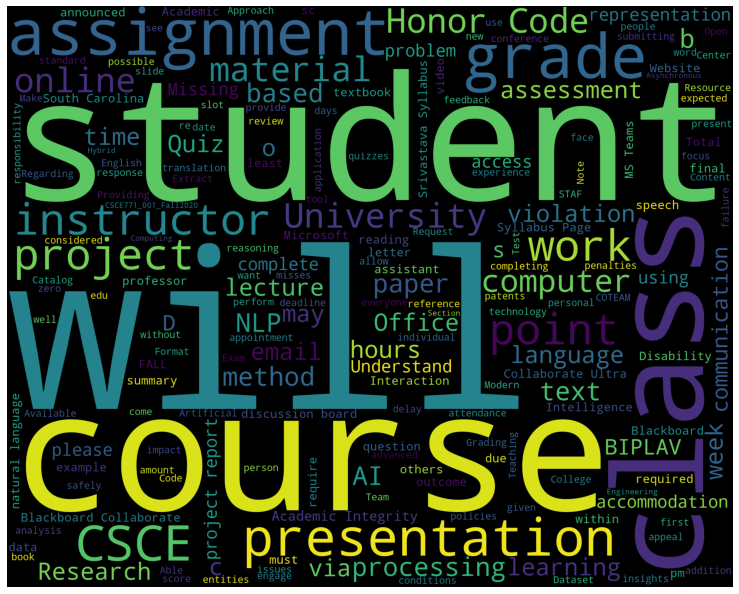

In [13]:
# Draw the visualization
wordcloud_draw(content)

# Do word tag for all documents

In [14]:
# Get content in all files into one string 
pathFilesToUse = 'data/output/'

all_content = ''
count = 0
for file in glob.glob(pathFilesToUse + '*.txt'):
    print("file = " + file)
    file_handle = open(file, 'r')
    content = str( file_handle.read()).split()
    #content_as_str = " ".join(sorted(set(content), key=content.index))
    # Has duplicates
    content_as_str = " ".join(content)
    # All together
    all_content = all_content + content_as_str
    #all_content.append(content)
    count = count + 1
    file_handle.close()

print('INFO: processed total files = ' + str(count))


file = data/output/Example-CSCE_590_Syllabus_Functional_Programming.txt
file = data/output/Example-CSCE210_002_Fall2020 .txt
file = data/output/Example-CSCE771_001_Fall2020.txt
INFO: processed total files = 3


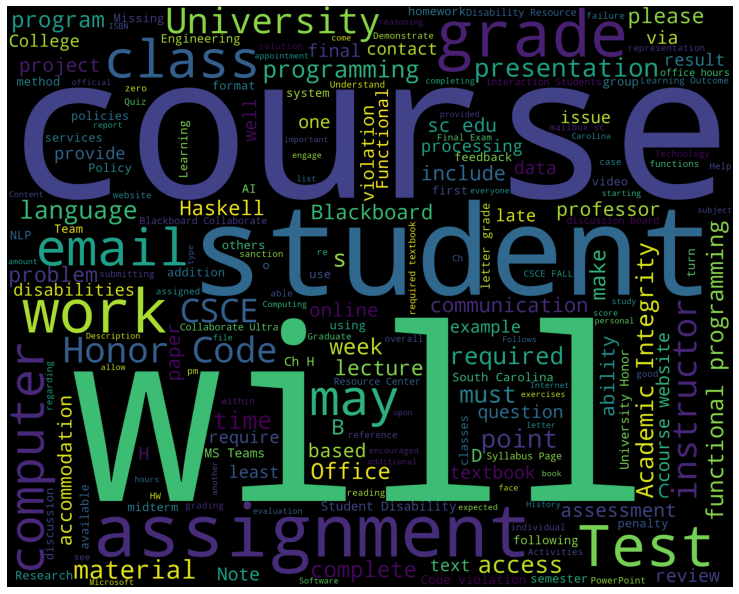

In [16]:
# Now do word tag cloud
wordcloud_draw(all_content.split())

# For advanced analysis
See https://www.datacamp.com/community/tutorials/wordcloud-python